In [1]:
# %matplotlib agg
%run utils.ipynb

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import pandas as pd
import numpy as np
import scipy as sp
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import arviz as az
import seaborn as sns

import kinesis as kn
import gapipes as gp

# This does not work with 'inline' backend: it will output latex
# compile error although PDF outputs etc will be saved correctly.
# I do not know why.
mystyledict.update({"text.usetex": True, "axes.unicode_minus": True})
plt.style.use(mystyledict)

In [5]:
%store -r out_full

In [13]:
def add_cartesian_xv(df):
    df["x"], df["y"], df["z"] = df.g.icrs.cartesian.xyz.value
    df["vx"], df["vy"], df["vz"] = df.g.icrs.velocity.d_xyz.value
    df["gx"], df["gy"], df["gz"] = df.g.galactic.cartesian.xyz.value
    df["gvx"], df["gvy"], df["gvz"] = df.g.galactic.velocity.d_xyz.value


add_cartesian_xv(out_full)

In [8]:
print('\n'.join(out_full.columns[out_full.columns.str.contains('leao')]))

in_leao
ID_leao
RA_leao
Dec_leao
M/R_leao
e_M/R_leao
GR_leao
C_leao
GR+C_leao
DRV_M02_leao
DRV_M02_GR_leao
DRV_M02_GR+C_leao
DRV_G17_leao
DRV_G17_GR_leao
DRV_G17_GR+C_leao
SpType_leao
Vmag_leao
(B-V)_leao
e_(B-V)_leao
RV_P98_leao
eRV_P98_leao
RV_M02_leao
eRV_M02_leao
RV_G17_leao
eRV_G17_leao
RV_HARPS_leao
eRV_HARPS_leao
FWHM_leao
S/N_leao
Flag_leao
|r-rc|_leao
e|r-rc|_leao
V_alpha_leao
eV_alpha_leao
V_delta_leao
eV_delta_leao
CR_leao
RV_HARPS_GR+C_leao
RV_G17_CR_leao
DRV_G17_GR+C+CR_leao


In [14]:
df = out_full.loc[out_full['in_leao']==True]
print(len(df), 'rows')

63 rows


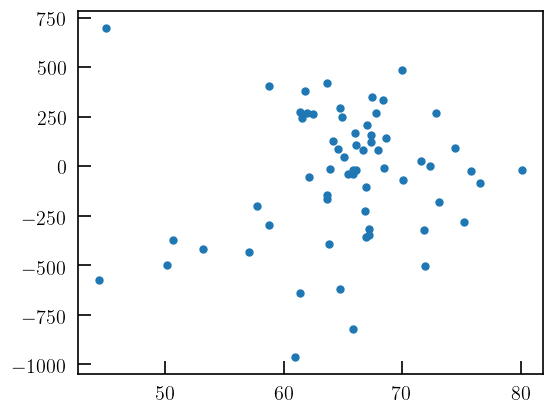

In [15]:
plt.scatter(df['ra'],df['DRV_G17_GR+C+CR_leao'],s=16);

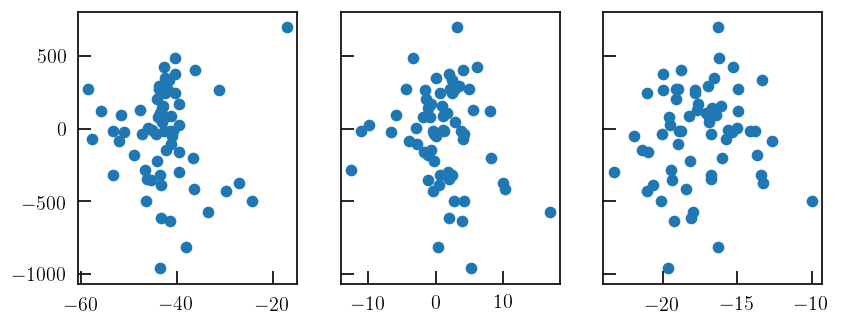

In [20]:
fig, ax = plt.subplots(1,3,figsize=(8,3), sharey=True)
ax[0].scatter(df['gx'],df['DRV_G17_GR+C+CR_leao']);
ax[1].scatter(df['gy'],df['DRV_G17_GR+C+CR_leao']);
ax[2].scatter(df['gz'],df['DRV_G17_GR+C+CR_leao']);

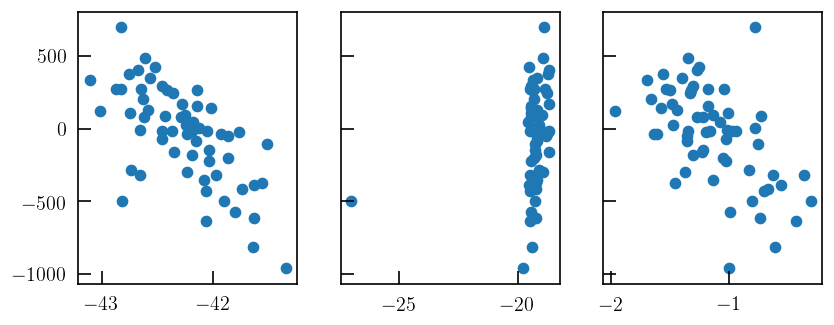

In [19]:
fig, ax = plt.subplots(1,3,figsize=(8,3), sharey=True)
ax[0].scatter(df['gvx'],df['DRV_G17_GR+C+CR_leao']);
ax[1].scatter(df['gvy'],df['DRV_G17_GR+C+CR_leao']);
ax[2].scatter(df['gvz'],df['DRV_G17_GR+C+CR_leao']);